In [7]:
%matplotlib inline
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import font_manager, rc
#한글 처리를 위해 폰트 설정
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

# 귀무가설 : 전기생산량과 전기소비량의 상관관계가 없다.
# 대립가설 : 전기생산량과 전기소비량의 상관관계가 있다.

X = [3.52, 2.58, 3.31, 4.07, 4.62, 3.98, 4.29, 4.83, 3.71, 4.61, 3.90, 3.20]
y = [2.48, 2.27, 2.47, 2.77, 2.98, 3.05, 3.18, 3.46, 3.03, 3.25, 2.67, 2.53]

# linregress(독립변수, 종속변수) 선형회귀분석
result = stats.linregress(X, y)
result
# p_value : 9.238421943157891e-05으로 0.05보다 작으므로 통계적으로 유의미함
# 귀무가설을 기각하고 대립가설을 채택한다.
# 결론 : 전기생산량과 전기소비량 간에 상관관계가 있다.
# 상관분석 : 두 변수 간에 어떤 선형적 관계가 있는지 분석

# slope = 기울기
# intercept = 편향 (y축의 높낮이)
# rvalue = 결정 또는 상관계수 (모형의 설명력) 0.0 ~ 1.0 (1.0이면 오차가 없는것이며, 0.7이상이 좋은 모델이다.)

LinregressResult(slope=0.4956032360182905, intercept=0.9195814280689418, rvalue=0.8929235125385305, pvalue=9.238421943157891e-05, stderr=0.07901935226531728, intercept_stderr=0.3110591892275586)

Text(0, 0.5, '전기사용량')

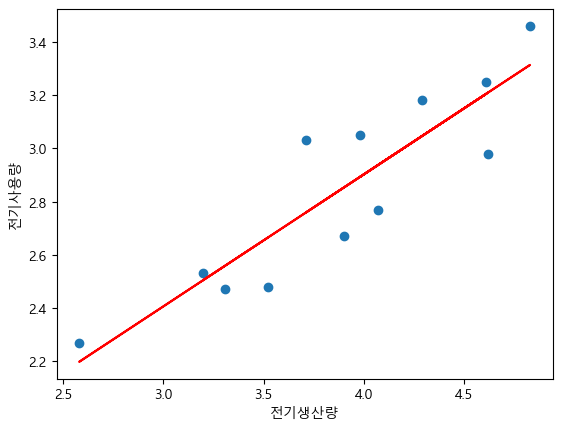

In [8]:
slope, intercept, r_value, p_value, stderr = stats.linregress(X, y)
x1 = np.array(X)
# 산점도 그리기
plt.scatter(X,y)
# 회귀선 그리기
plt.plot(x1, slope*x1 + intercept, c = "red")
plt.xlabel("전기생산량")
plt.ylabel("전기사용량")

In [10]:
# 생산량이 4일 때 전기사용량 예측
4*slope + intercept

2.901994372142104

p-value의 계산

t=4.752, p-value=0.000096
p-value < 0.05, 귀무가설 기각, 대립가설 채택
[-8.         -7.83838384 -7.67676768 -7.51515152 -7.35353535]
[3.39767312e-06 4.95353201e-06 7.17671574e-06 1.03327820e-05
 1.47840373e-05]


c:\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


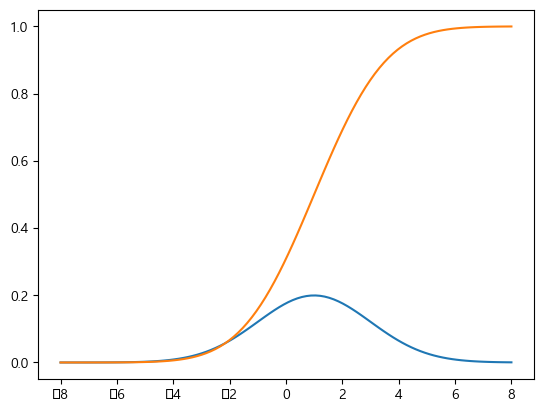

In [15]:
from math import sqrt
from numpy import mean
from scipy.stats import sem
from scipy.stats import t

# 독립표본 t검정: 표본으로부터 측정된 분산, 표준편차를 이용하여 두 모집단의 평균의 차이를 검정하는 방법
def independent_ttest(data1, data2):
    # 평균값
    mean1, mean2 = mean(data1), mean(data2)
    # 모집단이 큰 경우 표본을 여러번 추출하게 되는데 추출할 때마다 표본들의 평균값이 달라지게 됨, 표본평균의 표준편차를 표준오차라고 함(sem 함수로 계산)
    se1, se2 = sem(data1), sem(data2)
    # 표본간 차이에 대한 표준오차 계산
    sed = sqrt(se1**2 + se2**2)
    # t 통계량 계산
    t_stat = (mean1 - mean2) / sed
    # 자유도(degrees of freedom) 계산
    # 표본수가 n개인 표본이 있다면 표본값 중 자유롭게 변할 수 있는 값은 n-1개의 표본
    # 시험 3회 응시, 평균 80점이라고 할때 2개 시험에서 70점, 90점을 받았다면 나머지 1개는 80점이 되어야함, 표본수가 3일 고 자유롭게 변할 수 있는 값은 2
    df = len(data1) + len(data2) - 2
    # p-value 계산(cdf 누적분포함수)
    p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
    return t_stat, p

# 독립변수 (입력값)
X = [3.52, 2.58, 3.31, 4.07, 4.62, 3.98, 4.29, 4.83, 3.71, 4.61, 3.90, 3.20]
# 종속변수 (출력값)
y = [2.48, 2.27, 2.47, 2.77, 2.98, 3.05, 3.18, 3.46, 3.03, 3.25, 2.67, 2.53]

# 95% 신뢰수준
alpha = 0.05
t_stat, p = independent_ttest(X, y)
print('t=%.3f, p-value=%f' % (t_stat, p))

if p > alpha:
    print('p-value > 0.05, 귀무가설 채택, 대립가설 기각')
else:
    print('p-value < 0.05, 귀무가설 기각, 대립가설 채택')

# 참고
# 확률분포: 어떤 사건에 어느 정도의 확률이 할당되었는지를 묘사한것
# 누적분포함수(cumulative distribution function))
# 모든 사건에 대해 구간을 정의하기가 어려우므로 시작점을 마이너스무한대로 설정하고
# 마이너스무한대 ~ -1, 마이너스무한대 ~ 0, 마이너스무한대 ~ 1 식으로 구간을 정의하는 방법
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
xx = np.linspace(-8, 8, 100)
#print(xx)

#정규분포 생성, loc 분포의 기대값, scale 분포의 표준편차
rv = sp.stats.norm(loc=1, scale=2)

#누적분포함수
cdf = rv.cdf(xx)

#확률밀도함수(누적분포함수를 미분한 함수)
pdf = rv.pdf(xx)

print(xx[:5])
print(cdf[:5])
plt.plot(xx, pdf)
plt.plot(xx, cdf)
plt.show()

회귀함수

In [16]:
from sklearn.datasets import make_regression

X, y, w = make_regression(
 n_samples=50, n_features=1, bias=100, noise=10,
 random_state=0, coef=True
)
# 가상의 회귀분석 데이터 생성 함수
# n_samples : 샘플수
# n_features : 독립변수의 갯수
# bias: y 절편 (편향)
# noise: y 의 표준편차
# coef: 회귀계수(기울기) 사용 여부, True이면 w값을 리턴함

print(X[:5].flatten()) # flatten() 사용하여 1차원으로 변환
print(y[:5])
print(w)

[-0.85409574  1.49407907 -0.34791215  0.44386323 -0.18718385]
[ 69.16576208 129.94932345  80.01389923 100.30585701 107.20314663]
15.896958364551972


In [17]:
import numpy as np
xx = np.linspace(-3, 3, 100) # -3~3, 100등분
y0 = w * xx + 100

Text(0.5, 1.0, 'regression')

c:\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


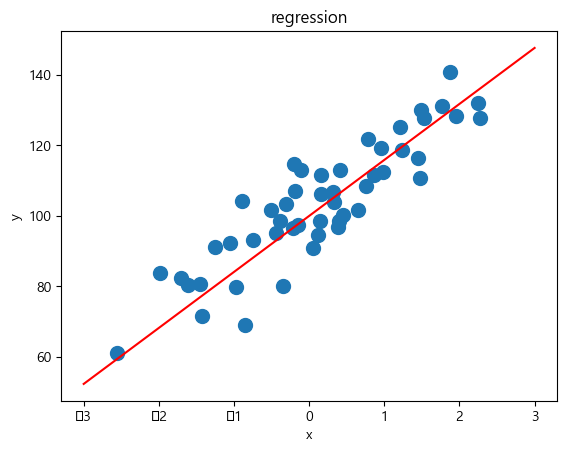

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(xx, y0, "r-") # 직선
plt.scatter(X, y, s=100) # 산점도
plt.xlabel("x")
plt.ylabel("y")
plt.title("regression")

In [19]:
from scipy import stats
stats.linregress(X.flatten(),y.flatten()) 

LinregressResult(slope=13.919604870077004, intercept=101.71369654235306, rvalue=0.8904486561806709, pvalue=4.961237023315404e-18, stderr=1.0268067233914187, intercept_stderr=1.1646716810599185)